<a href="https://colab.research.google.com/github/schmuecker/mldl_htwg/blob/master/trees_and_rf/Decission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn import tree

# Decission Tree for Classification

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2)
#dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [36, 34, 35]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 34, 35]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

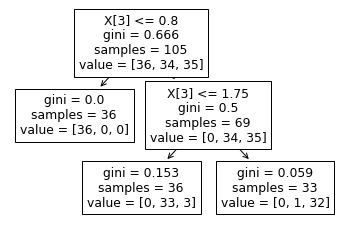

In [5]:
tree.plot_tree(dtree) 

In [6]:
ppred = dtree.predict_proba(X_test)
ppred

array([[0.        , 0.03030303, 0.96969697],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.03030303, 0.96969697],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

In [7]:
# The possible values for the probability
38/(38+4), 1-38/(38+4)

(0.9047619047619048, 0.09523809523809523)

In [8]:
np.argmax(ppred,axis=1) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
np.mean(np.argmax(ppred,axis=1) == y_test)

0.9555555555555556

### Decission Tree for Regression

Taken from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

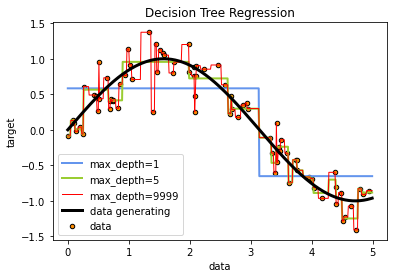

In [10]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)

def create_data():
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel() + np.random.normal(0,0.25,80)
    return X,y

X,y = create_data()
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=9999)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=9999", linewidth=1)
plt.plot(X_test[:,0], np.sin(X_test[:,0]), linewidth=3, color='black',label="data generating")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [17]:
#for i in range(100):
steps = 30
runs = 200
max_depth = 9999
y_val = np.zeros((runs,steps))
for i in range(runs):
    X,y = create_data()
    # Fit regression model
    regr = DecisionTreeRegressor(max_depth=max_depth)
    regr.fit(X,y)
    X_test = np.linspace(0.0, 5.0, steps)[:, np.newaxis]
    y_1 = regr.predict(X_test)
    y_val[i] = y_1

Text(0.5, 1.0, '200 trees with max depth = 9999')

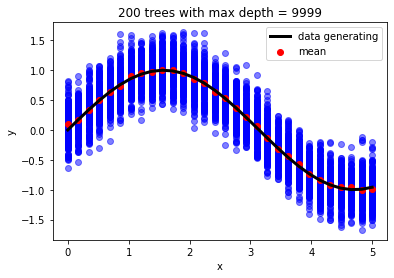

In [18]:
X_test = np.linspace(0.0, 5.0, steps)[:, np.newaxis]
for i in range(runs):
    plt.scatter(X_test,y_val[i], color='b', alpha=0.5)
plt.scatter(X_test,np.average(y_val,axis=0), color='r', label='mean')
plt.plot(X_test[:,0], np.sin(X_test[:,0]), linewidth=3, color='black',label="data generating")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('{} trees with max depth = {}'.format(runs, max_depth))

#### Suggestions for playing around
* Change maxdepth to 1

#### Observations

* Deep Trees have low bias, but hight variance